<a href="https://colab.research.google.com/github/tososomaru/ml/blob/master/pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Классификатор пород собак
породы собак: American Bulldog, Fox Terrier, Basset Hound

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import*
from fastai.metrics import error_rate

In [ ]:
bs = 64

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Создание датасета из Гугл Картинок



```
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-scr')?el.getAttribute('data-scr'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('/n')));
```



В [Гугл Картинках](https://www.google.com/imghp) произвести поиск желаемого класса для классификации. Пролистать до кнопки "Еще результаты".
В консоли на этой странице выполнить код:
```
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-scr')?el.getAttribute('data-scr'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('/n')));
```
Если на выходе нет csv файла с url, то выполнить этот код:


```
var urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
var hiddenElement = document.createElement('a');
hiddenElement.href = 'data:text/csv;charset=utf-8,' + encodeURI(urls.join('\n'));
hiddenElement.target = '_blank';
hiddenElement.download = 'myFile.txt';
hiddenElement.click();
```

Переименовать файл в название класса и сохранить как csv. Загрузить файлы на гугл диск

##Загрузка изображений

В списке указаны наименования классов

In [38]:
classes = ['american_bulldog', 'basset_hound', 'fox_terrier']
path = '/content/drive/My Drive/ml/dogs/'


In [41]:
for i in classes:
  dest = path+"/"+i
  folder = i
  file_csv = i + '.csv'
  download_images(path+folder+"/"+file_csv, dest, max_pics = 200)

##Верификация изображений

In [42]:
for c in classes:
  print(c)
  verify_images(path+'c', delete=True, max_size=500)

american_bulldog
basset_hound
fox_terrier


##Просмотр данных

In [44]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4
                                  ).normalize(imagenet_stats)

In [45]:
data.classes

['american_bulldog', 'basset_hound', 'fox_terrier']

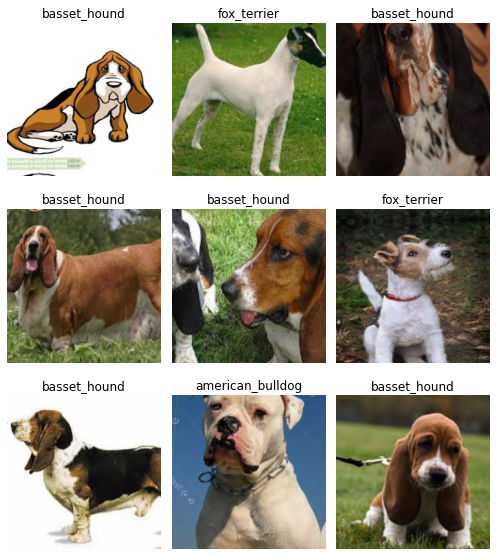

In [46]:
data.show_batch(rows=3, figsize=(7,8))

In [47]:
data.classes, data.c, len(data.train_ds),len(data.valid_ds)

(['american_bulldog', 'basset_hound', 'fox_terrier'], 3, 480, 120)

##Обучение модели

In [48]:
learn = cnn_learner(data,models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [49]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.774439,0.002151,0.000000,03:52
1,0.406215,0.012846,0.008333,03:45
2,0.285645,0.022901,0.008333,03:52
3,0.232449,0.021182,0.008333,03:46


In [50]:
learn.save('dogs')

##Улучшение модели

(не требуется)

In [ ]:
learn.load('dogs')

In [54]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

##Интерпретация

In [57]:
interp = ClassificationInterpretation.from_learner(learn)

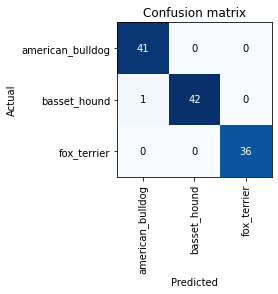

In [58]:
interp.plot_confusion_matrix()

##Ошибочные предсказания

In [66]:
help(interp.plot_top_losses)

Help on method _cl_int_plot_top_losses in module fastai.vision.learner:

_cl_int_plot_top_losses(k, largest=True, figsize=(12, 12), heatmap:bool=False, heatmap_thresh:int=16, alpha:float=0.6, cmap:str='magma', show_text:bool=True, return_fig:bool=None) -> Union[matplotlib.figure.Figure, NoneType] method of fastai.train.ClassificationInterpretation instance
    Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.



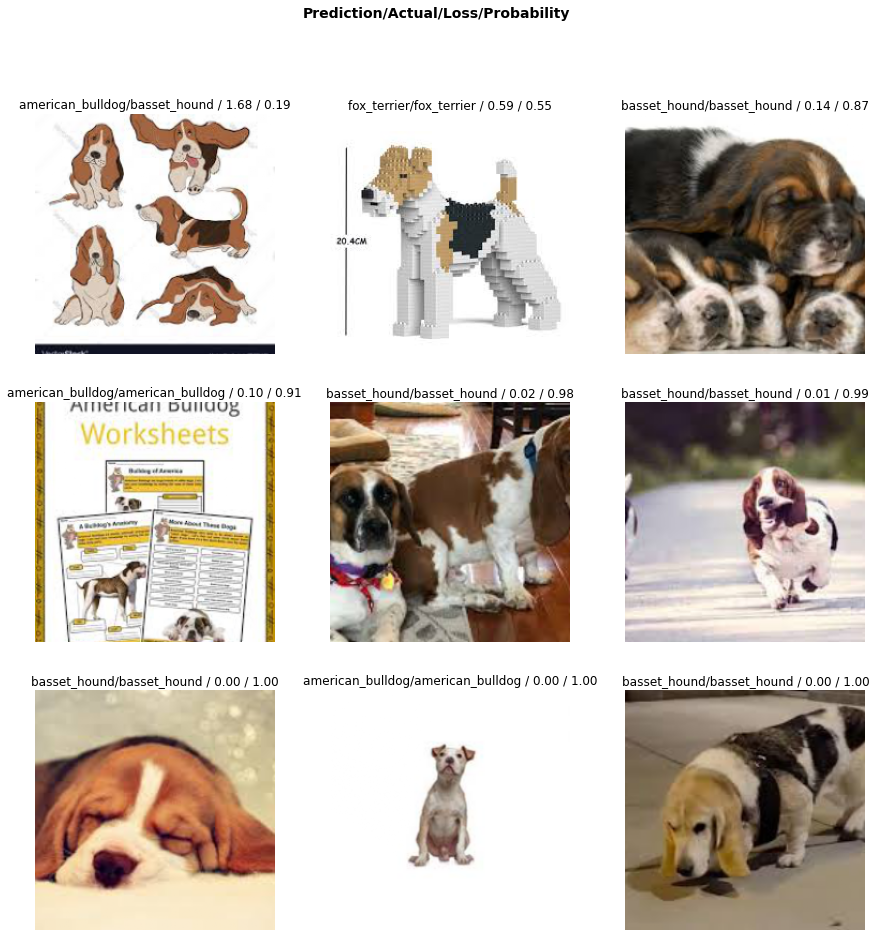

In [69]:
interp.plot_top_losses(9, figsize=(15,15))